# Engineering vs Physics conventions

In engineering contexts, a forward traveling wave is defined as $cos(\omega t - kz)$ and a corresponing phasor $exp(-jkz)$, but this is merely convention. In physics communities an opposite sign conventioned is used: the physics definition of a forward traveling wave is $cos(-\omega t + kz)$ with the corresponding phasor $exp(ikz)$

Simulators such as Lumerical use the physics convention for their simulations and data https://optics.ansys.com/hc/en-us/articles/1500006150981-Circular-polarization-and-phase-convention . Since Simphony's simulators are meant to be compatible with software such as Lumerical, our interface also assumes the Physics sign convention for forward traveling waves.

It is important to understand this distinction since many of the articles describing the algorithms used in Simphony often use the engineering convention such as this paper on the Vector Fitting Method: https://www.sciencedirect.com/science/article/pii/S0030399224001762 . Nevertheless, Simphony's default API will use the physics convention.

# Key Differences

In engineering contexts group delay is defined as $\tau_{g}^{ENG} = - \frac{d\phi(\omega)}{d\omega}$ while under the physics convention the minus sign is dropped $\tau_{g}^{PHYS} = \frac{d\phi(\omega)}{d\omega}$

This can lead to confusion, for example, consider this simple model for a waveguide.

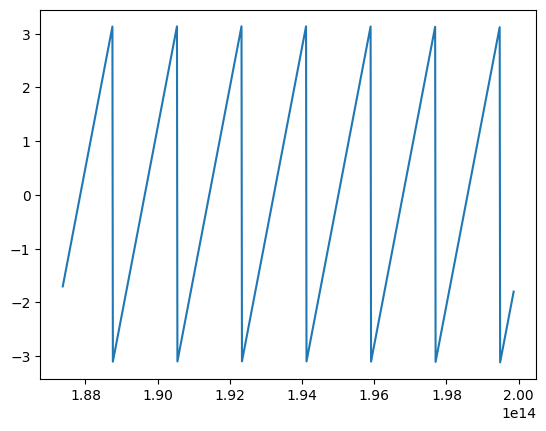

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from simphony.libraries import siepic
from scipy.constants import speed_of_light as c

f_min = c / (1.6e-6)
f_max = c / (1.5e-6)
f = np.linspace(f_min, f_max, 1000)
s_params = siepic.waveguide(1e6*c/f, length=40)

plt.plot(f, np.angle(s_params[('o0', 'o1')]))

If we mistakenly assume this data follows the Engineering convention, then the S-parameter data would not indicate a simple delay, rather, an advance, which would be unphysical. Some functions Simphony provides are sensitive to this dinstinction, for example, our Vector Fitting implementations

ImportError: SiPANN must be installed to use the SiPANN wrappers. To install SiPANN, run `pip install SiPANN`.

In [ ]:
s_params = siepic.y_branch(1e6*c/f)

plt.plot(f, np.angle(s_params[('port_1', 'port_2')]))

In [ ]:
from simphony.time_domain.vector_fitting.s_domain import vector_fitting



poles, residues, feedthrough, error = vector_fitting(50, )